## 로봇 유형 분석

In [1]:
import pandas as pd

### 데이터 확인

In [2]:
corporation = pd.read_csv('corporation_final.csv')
corporation 

,회사이름,위치,위도,경도,규모,상장여부,로봇 유형,부분별,수상,Unnamed: 9,설립일,부지 선정 이유
0,㈜티라로보틱스,"경기 성남시 중남구 둔촌대로 388 상대원동, 크란츠테크노 304호",37.432708,127.159384,중소기업,비상장,AMR,전문 서비스 로봇,이번에 처음 2022 올해의 대한민국 로봇 기업에 선정되었다.,NaN,2022.0,NaN
1,(주)유진로봇,"인천 연수구 하모니로 187번길 33 송도동, (주)유진로봇",37.377969,126.643637,중견기업,상장,AMR,개인 서비스 로봇,"2020 아이클레보 대한민국 고객만족지수 1위(한국프리미엄브랜드진흥원), 2020...",NaN,1988.0,서비스 로봇 연구 및 제조시설 확대 연구소는 금천구 가산동도 있지만 분산된 시설을 ...
2,(주)트위니,대전광역시 유성구 가정북로 90,36.353984,127.341132,중소기업,비상장,AMR,전문 서비스 로봇,"중소벤처기업부, 2023 로봇 분야 초격차 스타트업 육성 위해 10개 사와 간담회 ...",NaN,2015.0,NaN
3,엑스와이지,"서울 성동구 아차산로17길 48, 401호",37.548223,127.045992,벤처기업,비상장,"delivery,coffee",전문 서비스 로봇,"2020 레드닷 디자인 어워드, 2022 아기유니콘 선정, 2022 도시혁신대상 경...",NaN,2019.0,NaN
4,텔레웍스,서울 금천구 가산디지털1로 168 가산동 우림라이온스벨리 A동 1212호,37.479905,126.882481,중소기업,비상장,"IoT,network",NaN,NaN,NaN,1994.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
80,비트코퍼레이션,경기도 성남시 분당구 분당로 55( 서현동) 9층,37.382842,127.121656,중소기업,비상장,coffee,NaN,NaN,NaN,NaN,NaN
81,에스티씨엔지니어링,경기 평택시 서탄면 수월암길 113-18,37.123382,127.042929,중소기업,비상장,industrial,NaN,NaN,NaN,NaN,NaN
82,구루아이오티,서울 금천구 가산디지털1로 219 벽산디지털밸리6차 801-1호,37.484529,126.878942,벤처기업,비상장,guard,NaN,NaN,NaN,NaN,NaN
83,미래컴퍼니,\n서울 송파구 송파대로 155 NH농협빌딩 3층,37.484082,127.122681,중견기업,상장,surgery,NaN,NaN,NaN,NaN,NaN


In [13]:
for i in corporation["로봇 유형"]:
    print(i)

AMR
AMR
AMR
delivery,coffee
IoT,network
AMR,serving, guide
industrial
industrial, healthcare
CAD SW
farm
unknown
picking
guide, picking, AMR
delivery, motor
4foot
education
food
delivery
surgery
cleaning, guard
data analysis
security
delivery
engineering
shipment
industrial
industrial
AMR, industrial, monitoring
testing
industrial
industrial
healthcare
industrial
monitoring
AMR, AGV, delivery, industrial
AMR, healthcare, industrial
guide, AMR
guide, AMR
data analysis
education
education
delivery, quarantine
cleaning
AMR, monitoring
education
AMR, industrial
unknown
farm
delivery
delivery, guard
education
healthcare
delivery
delivery
AMR, serving
serving
transform
transform
delivery
guide, charge, wearable, AMR, delivery
unknown
unknown
healthcare
industrial
unknown
AMR
unknown
unknown
unknown
healthcare
unknown
AMR, AGV
industrial
AMR, industrial, wearable
AMR, AGV, industrial, 4foot
industrial, 4foot, 2foot, astro, coffee, AMR
industrial, healthcare
guard
delivery, guide, cleaning, qu

### 로봇 유형 분석

In [4]:
robot_set= []
# skill_dic = {}

for robot_type in corporation["로봇 유형"]:
    if ',' in robot_type:
        for r in robot_type.split(','):
            r = r.strip()
            if not r in robot_set:
                robot_set.append(r)
    else:
        robot_type = robot_type.strip()
        if not robot_type in robot_set:
            robot_set.append(robot_type)

robot_set

['AMR',
 'delivery',
 'coffee',
 'IoT',
 'network',
 'serving',
 'guide',
 'industrial',
 'healthcare',
 'CAD SW',
 'farm',
 'unknown',
 'picking',
 'motor',
 '4foot',
 'education',
 'food',
 'surgery',
 'cleaning',
 'guard',
 'data analysis',
 'security',
 'engineering',
 'shipment',
 'monitoring',
 'testing',
 'AGV',
 'quarantine',
 'transform',
 'charge',
 'wearable',
 '4foor',
 '2foot',
 'astro']

### 이상치 제거
- ex) 4foor 같은 오타


In [12]:
corporation["로봇 유형"][75] = 'industrial, 4foot, 2foot, astro, coffee, AMR'


'industrial, 4foot, 2foot, astro, coffee, AMR'

### robot_type 용어들이 얼마나 많이 반복됐는지 파악

In [14]:
robot_dic ={}
for i in robot_set:
    robot_dic[i] = 0

for robot in corporation["로봇 유형"]:
    if ',' in robot:
        for r in robot.split(','):
            r = r.strip()
            robot_dic[r] += 1
    else:
        robot = robot.strip()
        robot_dic[robot] += 1
robot_dic
    

{'AMR': 19,
 'delivery': 13,
 'coffee': 3,
 'IoT': 1,
 'network': 1,
 'serving': 3,
 'guide': 6,
 'industrial': 19,
 'healthcare': 7,
 'CAD SW': 1,
 'farm': 2,
 'unknown': 10,
 'picking': 2,
 'motor': 1,
 '4foot': 3,
 'education': 5,
 'food': 1,
 'surgery': 2,
 'cleaning': 3,
 'guard': 4,
 'data analysis': 2,
 'security': 1,
 'engineering': 1,
 'shipment': 1,
 'monitoring': 3,
 'testing': 1,
 'AGV': 3,
 'quarantine': 2,
 'transform': 2,
 'charge': 1,
 'wearable': 2,
 '4foor': 0,
 '2foot': 1,
 'astro': 1}

In [21]:
robot_dic['4foot'] = 4

### 시각화

In [17]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'    

In [30]:
x = []
y = []
for  i in robot_dic:
    x.append(i)
    y.append(robot_dic[i])

In [31]:
robot_df = pd.DataFrame(x)
robot_df["num"] = y
robot_df.sort_values("num", ascending=False)

,0,num
0,AMR,19
7,industrial,19
1,delivery,13
11,unknown,10
8,healthcare,7
6,guide,6
15,education,5
19,guard,4
14,4foot,4
26,AGV,3


In [57]:
robot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       33 non-null     object
 1   num     33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 656.0+ bytes


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

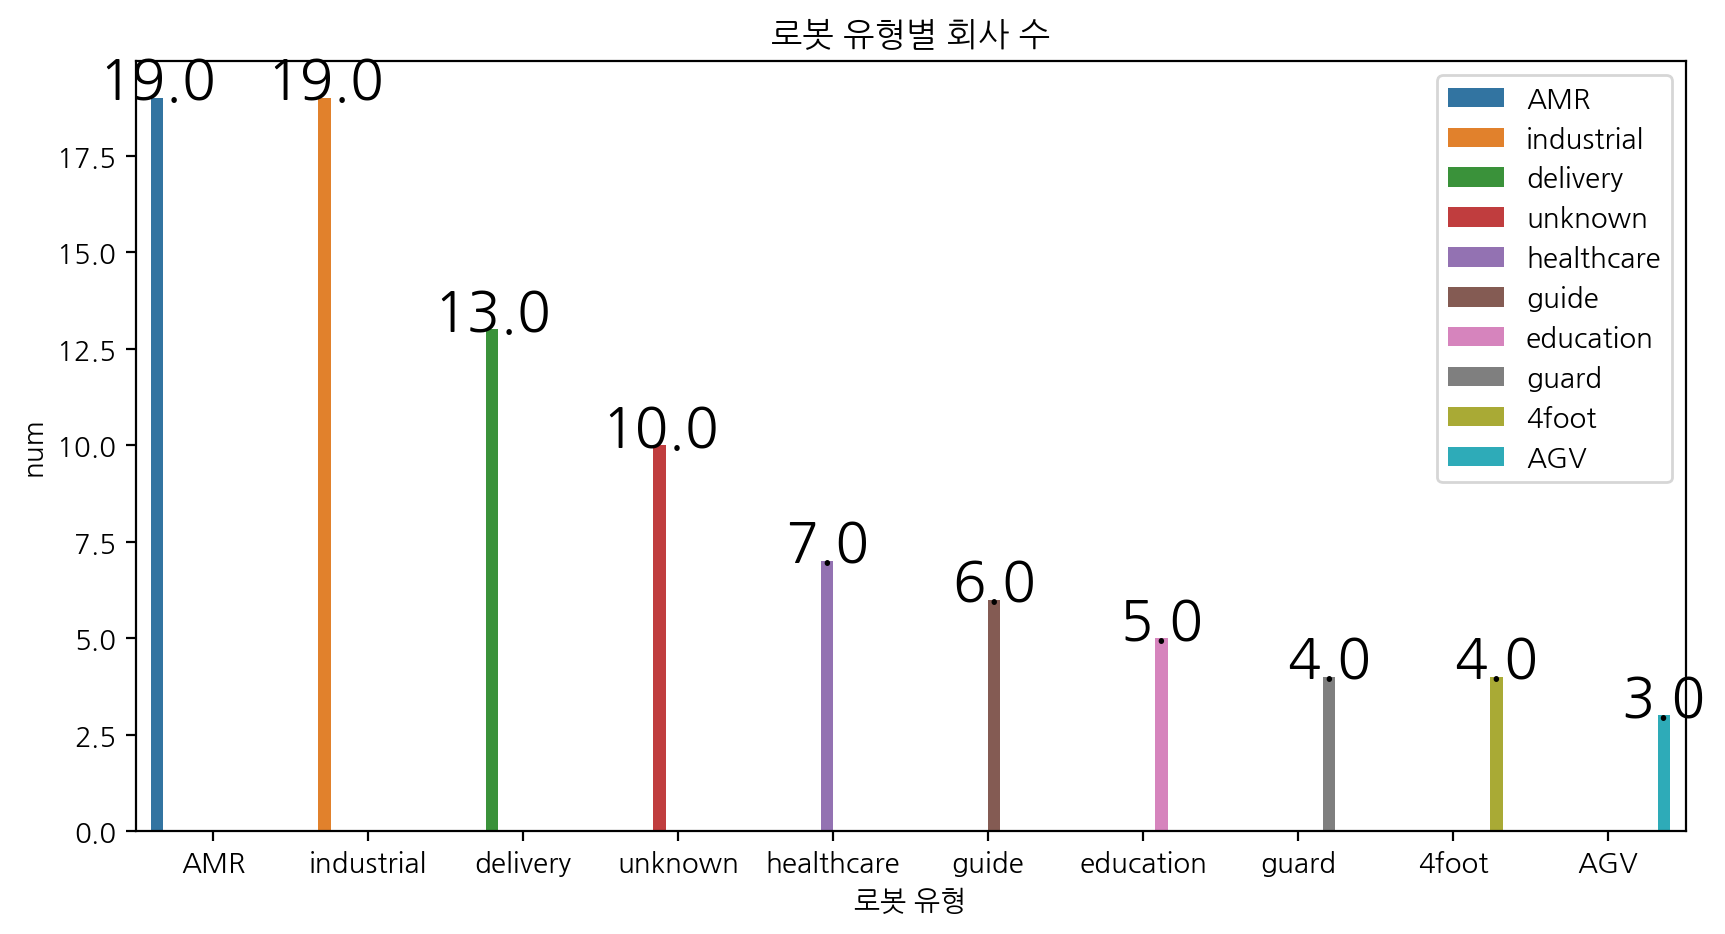

In [90]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(x=0, y=robot_df["num"],hue=0,data=robot_df.sort_values("num", ascending=False).head(10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height , height, ha = 'center', size = 20)
plt.title("로봇 유형별 회사 수")
plt.xlabel("로봇 유형")
plt.show();